#Make Money with Machine Learning
##Week 2 Assignment
Build 3 different types of regression lines to predict stock prices using Python, then print out the prediction for the best performing one.

Using previously downloaded historical CSV file for Bitcoin stored in personal GDrive.




###Load dependencies


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

import sklearn
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn import preprocessing
from sklearn.model_selection import train_test_split



###Mount GDrive
Then confirm that the path you plan to load the CSV from.



In [117]:
 from google.colab import drive
drive.mount('drive', force_remount=True)

Mounted at drive


In [118]:
!ls "/content/drive/My Drive/Colab Notebooks"

'Agent Trading.ipynb'		       Keras_TransferLearning_Example.ipynb
 BTC-USD.csv			      'LSTM Predictor.ipynb'
 CAT.csv			      'lstm_stock_market_prediction (1).ipynb'
'Copy of homework_week2.ipynb'	       lstm_stock_market_prediction.ipynb
'Copy of prediction.ipynb'	      'Stock Prediction model.ipynb'
 horses.csv			       Untitled0.ipynb
'Keras LSTM Stock Predictor 1.ipynb'   Week2-StockPricePrediction.ipynb


###Load historical prices into dataframe
Perform quick EDA to confirm all looks good.

In [119]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/BTC-USD.csv')

df.set_index('Date', inplace=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-01,429.950012,437.950012,425.859985,433.989990,433.989990,20334286
2016-01-02,433.989990,437.429993,430.730011,433.720001,433.720001,14566820
2016-01-03,433.720001,434.140015,423.089996,430.700012,430.700012,23490162
2016-01-04,430.700012,435.260010,428.600006,433.320007,433.320007,22943968
2016-01-05,433.320007,435.250000,428.869995,431.200012,431.200012,19499588


In [120]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-08-30,9492.809570,9699.849609,9368.269531,9587.250000,9587.250000,276606372
2019-08-31,9587.250000,9714.110352,9512.030273,9624.540039,9624.540039,148320616
2019-09-01,9624.540039,9823.530273,9578.660156,9768.360352,9768.360352,149995549
2019-09-02,9768.360352,10459.000000,9764.759766,10387.500000,10387.500000,429220162
2019-09-03,10387.530273,10773.269531,10296.299805,10673.730469,10673.730469,412216768


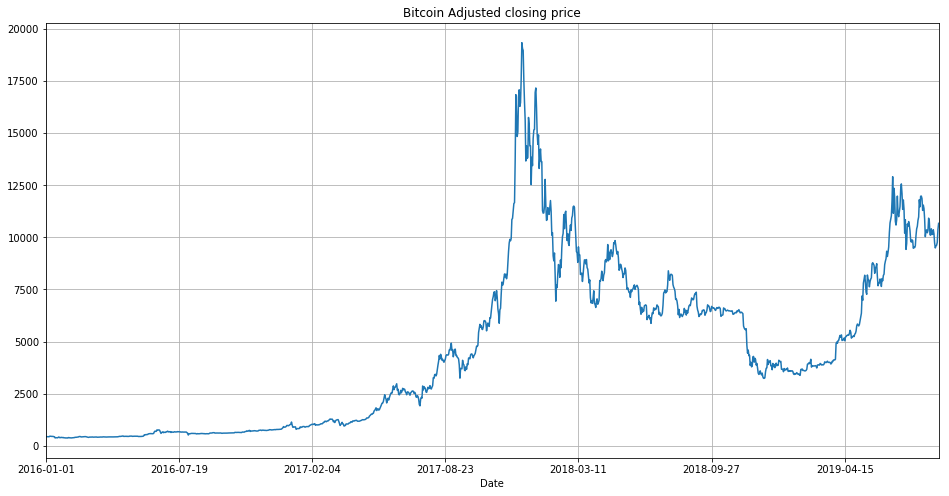

In [121]:
df['Adj Close'].plot(label='BTC', figsize=(16,8), title='Bitcoin Adjusted closing price', grid=True)

###Model #1 - Linear Regression

Note: While applying the various models to the data, I really struggled ensuring that I had my dataframes setup correctly. I ultimately needed to borrow the setup from another student so I need to research why this worked while my logic didn't.

In [0]:
window_size = 32 #Look back 32 days
# Prepare the data so that we have 32 day windows and predict what the day 33 should be

# Get indices of access for the data
num_samples = len(df) - window_size
indices = np.arange(num_samples).astype(np.int)[:,None] + np.arange(window_size + 1).astype(np.int)

In [0]:
data = df['Adj Close'].values[indices]

In [0]:
X = data[:,:-1] # Each row represents 32 days in the past
y = data[:,-1] # Each output value represents the 33rd day

Split our data into 80% training and hold back 20% for testing

In [0]:
# Train and test split
split_fraction = 0.8
ind_split = int(split_fraction * num_samples)
X_train = X[:ind_split]
y_train = y[:ind_split]
X_test = X[ind_split:]
y_test = y[ind_split:]

Instantiate our model and train it

In [127]:
linear_model = LinearRegression(n_jobs=-1)

linear_model.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

Peform predictions

In [0]:
y_linear_pred_train = linear_model.predict(X_train)
y_linear_pred = linear_model.predict(X_test)

Plot our training data

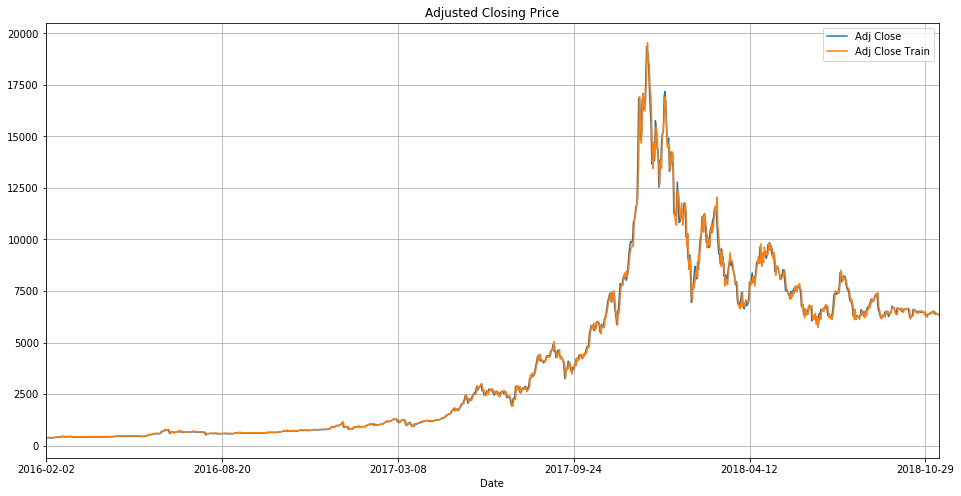

In [130]:
df_linear = df.copy()
df_linear.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df_linear = df_linear.iloc[window_size:ind_split] # Past 32 days we don't know yet
df_linear['Adj Close Train'] = y_linear_pred_train[:-window_size]
df_linear.plot(label='BTC', figsize=(16,8), title='Adjusted Closing Price', grid=True)

Plot our test data

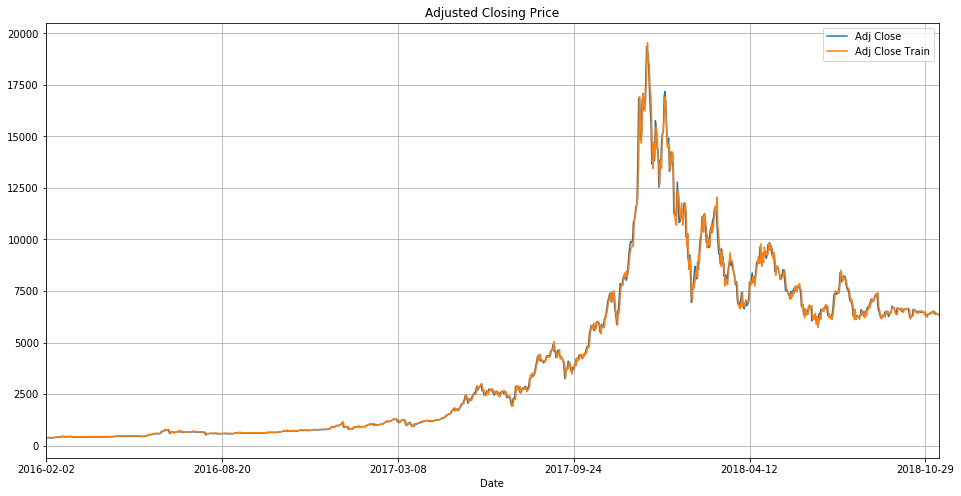

In [131]:
df_linear = df.copy()
df_linear.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df_linear = df_linear.iloc[window_size:ind_split] # Past 32 days we don't know yet
df_linear['Adj Close Train'] = y_linear_pred_train[:-window_size]
df_linear.plot(label='AAPL', figsize=(16,8), title='Adjusted Closing Price', grid=True)

###Model #2 - Ridge Regression

Just as we did before, instantiate our model and train it using the previously created train/test sets

In [133]:
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

Perform our predections

In [0]:
y_pred_train_ridge = ridge_model.predict(X_train)
y_pred_ridge = ridge_model.predict(X_test)

Plot our results

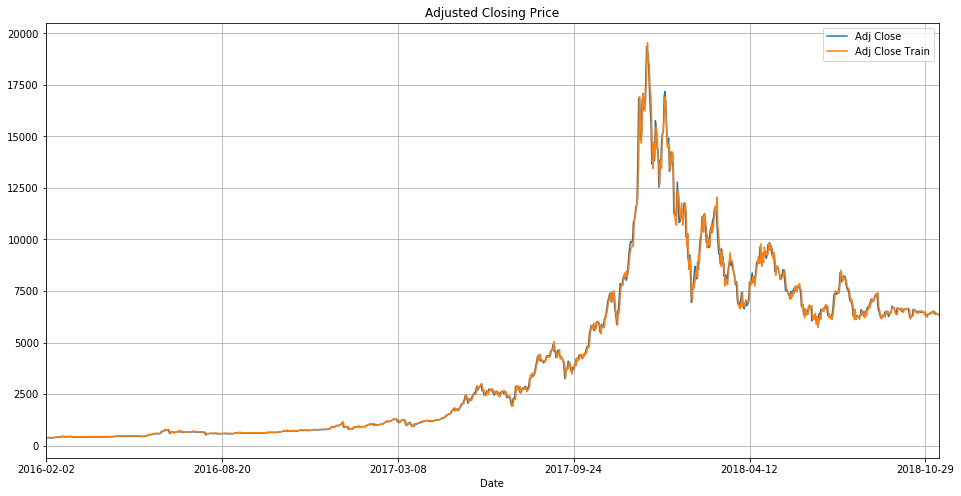

In [135]:
df_ridge = df.copy()
df_ridge.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df_ridge = df_ridge.iloc[window_size:ind_split] # Past 32 days we don't know yet
df_ridge['Adj Close Train'] = y_pred_train_ridge[:-window_size]
df_ridge.plot(label='BTC', figsize=(16,8), title='Adjusted Closing Price', grid=True)

###Model 3 - Lasso Regression

In [137]:
lasso_model = Lasso(alpha=0.1)

lasso_model.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 46208778.73402217, tolerance: 1639651.7107489712
  positive)


Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Perform our predictions

In [0]:
y_pred_train_lasso = lasso_model.predict(X_train)
y_pred_lasso = lasso_model.predict(X_test)

Plot training data results

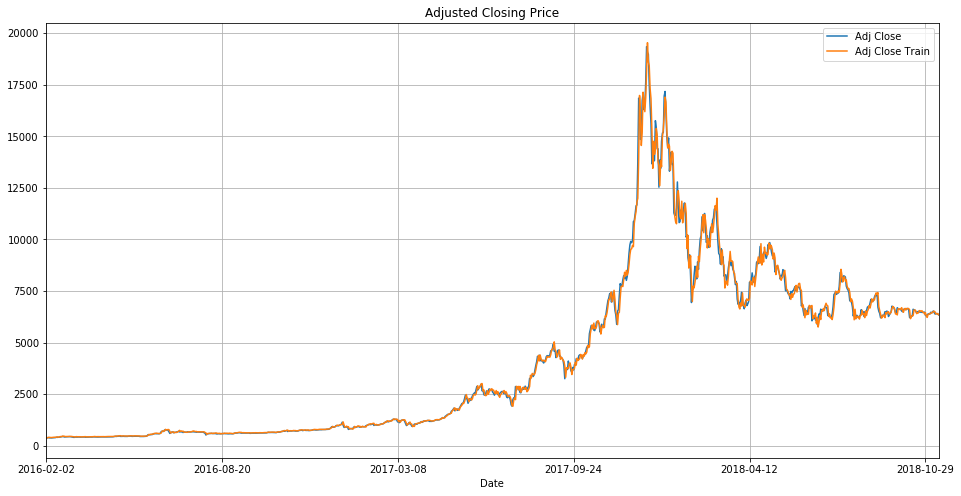

In [139]:
df_lasso = df.copy()
df_lasso.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df_lasso = df_lasso.iloc[window_size:ind_split] # Past 32 days we don't know yet
df_lasso['Adj Close Train'] = y_pred_train_lasso[:-window_size]
df_lasso.plot(label='AAPL', figsize=(16,8), title='Adjusted Closing Price', grid=True)

Plot testing data results

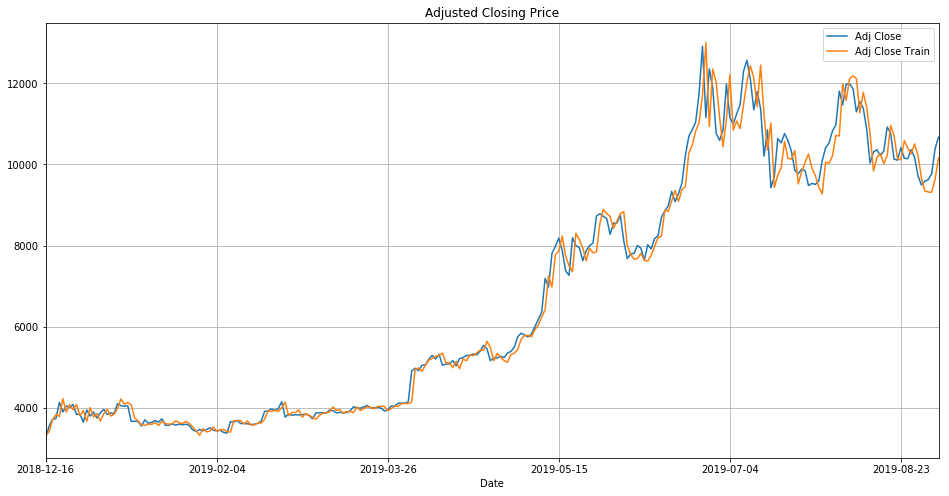

In [140]:
df_lasso = df.copy()
df_lasso.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df_lasso = df_lasso.iloc[ind_split+window_size:] # Past 32 days we don't know yet
df_lasso['Adj Close Train'] = y_pred_lasso
df_lasso.plot(label='AAPL', figsize=(16,8), title='Adjusted Closing Price', grid=True)